In [1]:
# http://gluon.mxnet.io/chapter02_supervised-learning/linear-regression-scratch.html

In [2]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon
mx.random.seed(1)


In [3]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

In [4]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape=(num_examples, num_inputs), ctx=data_ctx)
noise = .1 * nd.random_normal(shape=(num_examples,), ctx=data_ctx)
y = real_fn(X) + noise

In [5]:
print(X[0])
print(y[0])


[-1.30644417  0.11287736]
<NDArray 2 @cpu(0)>

[ 1.12662494]
<NDArray 1 @cpu(0)>


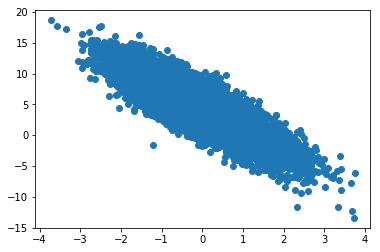

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 1].asnumpy(),y.asnumpy())
plt.show()


In [7]:
batch_size = 4


In [8]:
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                      batch_size=batch_size, shuffle=True)

In [9]:
w = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b = nd.random_normal(shape=num_outputs, ctx=model_ctx)
params = [w, b]

In [11]:
for param in params:
    param.attach_grad()

In [12]:
def net(X):
    return mx.nd.dot(X, w) + b

In [13]:
def square_loss(yhat, y):
    return nd.mean((yhat - y) ** 2)

In [14]:
def SGD(params, lr):
    for param in params:
        param[:] = param - lr * param.grad

In [15]:
epochs = 10
learning_rate = .0001
num_batches = num_examples/batch_size

In [16]:
for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()
    print(cumulative_loss / num_batches)

31.1384246279
11.4201903404
4.19257462647
1.54330475454
0.572137034985
0.216108132322
0.0855545468152
0.0376734019976
0.0201105861138
0.0136818899995


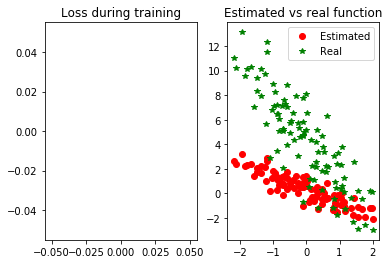

Epoch 0, batch 2499. Mean loss: 14.0176543603
Epoch 1, batch 2499. Mean loss: 5.14693526076
Epoch 2, batch 2499. Mean loss: 1.8935419602
Epoch 3, batch 2499. Mean loss: 0.700752994826
Epoch 4, batch 2499. Mean loss: 0.263376924063
Epoch 5, batch 2499. Mean loss: 0.102925140879
Epoch 6, batch 2499. Mean loss: 0.0440689537166
Epoch 7, batch 2499. Mean loss: 0.0224764629627
Epoch 8, batch 2499. Mean loss: 0.0145397898692
Epoch 9, batch 2499. Mean loss: 0.0116328519781


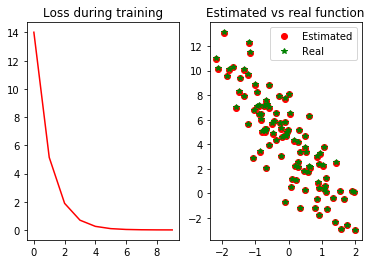

In [17]:
############################################
#    Re-initialize parameters because they
#    were already trained in the first loop
############################################
w[:] = nd.random_normal(shape=(num_inputs, num_outputs), ctx=model_ctx)
b[:] = nd.random_normal(shape=num_outputs, ctx=model_ctx)

############################################
#    Script to plot the losses over time
############################################
def plot(losses, X, sample_size=100):
    xs = list(range(len(losses)))
    f, (fg1, fg2) = plt.subplots(1, 2)
    fg1.set_title('Loss during training')
    fg1.plot(xs, losses, '-r')
    fg2.set_title('Estimated vs real function')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             net(X[:sample_size, :]).asnumpy(), 'or', label='Estimated')
    fg2.plot(X[:sample_size, 1].asnumpy(),
             real_fn(X[:sample_size, :]).asnumpy(), '*g', label='Real')
    fg2.legend()

    plt.show()

learning_rate = .0001
losses = []
plot(losses, X)

for e in range(epochs):
    cumulative_loss = 0
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx).reshape((-1, 1))
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        SGD(params, learning_rate)
        cumulative_loss += loss.asscalar()

    print("Epoch %s, batch %s. Mean loss: %s" % (e, i, cumulative_loss/num_batches))
    losses.append(cumulative_loss/num_batches)

plot(losses, X)